In [1]:
import pandas as pd
import numpy as np

In [2]:
dia1=pd.read_csv("C:/Users/admin/Desktop/sem 3/seema maam/diabetes_null.csv")

In [3]:
dia1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [4]:
dia1.shape

(768, 9)

In [5]:
dia1.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64

In [6]:
#delete row
dia1_no_missing=dia1.dropna(axis=0)
print(dia1_no_missing.head())

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0            4.0           35.0    168.0  43.1   
6             3     78.0            5.0           32.0     88.0  31.0   
8             2    197.0            7.0           45.0    543.0   3.5   
13            1    189.0            6.0           23.0    846.0   3.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  


In [7]:
#imputer to replace Null with mean
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp.fit(dia1)
dia2=pd.DataFrame(data=imp.transform(dia1),columns=dia1.columns)

print(dia2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  105.659898  33.6   
1          1.0     85.0           66.0      29.000000  105.659898  26.6   
2          8.0    183.0           64.0      25.876155  105.659898  23.3   
3          1.0     89.0           66.0      23.000000   94.000000  28.1   
4          0.0    137.0            4.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [8]:
#imputer to replace Null with median
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
imp.fit(dia1)
dia3=pd.DataFrame(data=imp.transform(dia1),columns=dia1.columns)

print(dia3.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0     71.0  33.6   
1          1.0     85.0           66.0           29.0     71.0  26.6   
2          8.0    183.0           64.0           27.0     71.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0            4.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627   5.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


In [9]:
#function to find outliers
def find_outliers_turkey(x):
    q1=x.quantile(.25)
    q3=x.quantile(.75)
    iqr=q3-q1
    floor=q1-1.5*iqr
    ceiling=q3+1.5*iqr
    outlier_indices=list(x.index[(x<floor)|(x>ceiling)])
    outlier_values=list(x[outlier_indices])
    return outlier_indices,outlier_values

In [13]:
print("Outliers for Glucose")
glucose_indices, glucose_values=find_outliers_turkey(dia1['Glucose'])
print(np.sort(glucose_values))
print("\n")

print("Outliers for Pregnancies")
pr_indices, pr_values=find_outliers_turkey(dia1['Pregnancies'])
print(np.sort(pr_values))
print("\n")

print("Outliers for BloodPressure")
bp_indices, bp_values=find_outliers_turkey(dia3['BloodPressure'])
print(np.sort(bp_values))
print("\n")

print("Outliers for SkinThickness")
st_indices, st_values=find_outliers_turkey(dia1['SkinThickness'])
print(np.sort(st_values))
print("\n")

print("Outliers for Insulin")
ins_indices, ins_values=find_outliers_turkey(dia1['Insulin'])
print(np.sort(ins_values))
print("\n")

print("Outliers for BMI")
bmi_indices, bmi_values=find_outliers_turkey(dia1['BMI'])
print(np.sort(bmi_values))
print("\n")

print("Outliers for Age")
age_indices, age_values=find_outliers_turkey(dia1['Age'])
print(np.sort(age_values))
print("\n")

print("Outliers for DiabetesPedigreeFunction")
dpf_indices, dpf_values=find_outliers_turkey(dia1['DiabetesPedigreeFunction'])
print(np.sort(dpf_values))

Outliers for Glucose
[]


Outliers for Pregnancies
[14 14 15 17]


Outliers for BloodPressure
[122.]


Outliers for SkinThickness
[63. 99.]


Outliers for Insulin
[375. 387. 392. 415. 465. 474. 478. 485. 495. 495. 543. 545. 579. 744.
 846.]


Outliers for BMI
[ 2.   2.1  2.4  2.4  2.8  2.8  3.   3.   3.   3.   3.   3.   3.   3.1
  3.1  3.1  3.1  3.1  3.1  3.1  3.1  3.1  3.2  3.3  3.4  3.4  3.4  3.4
  3.4  3.4  3.4  3.5  3.5  3.5  3.5  3.5  3.5  3.5  3.7  3.8  3.8  3.8
  3.8  3.8  3.8  3.8  3.8  3.8  3.9  3.9  3.9  3.9  3.9  4.   4.   4.1
  4.2  4.5  4.5  4.5  4.6  4.6  4.6  4.6  4.7  4.8  4.9  4.9  5.  52.3
 52.3 52.9 53.2 55.  57.3 59.4 67.1]


Outliers for Age
[62 62 62 62 63 63 63 63 64 65 65 65 66 66 66 66 67 67 67 68 69 69 72 81]


Outliers for DiabetesPedigreeFunction
[1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.34  1.353 1.39  1.391 1.394
 1.4   1.441 1.461 1.476 1.57  1.6   1.698 1.699 1.72  1.731 1.76  1.781
 1.893 1.95  1.96  2.137 2.288 2.329 2.42 ]


In [14]:
df_del=dia3.drop(bp_indices)
print(bp_indices)

[106]


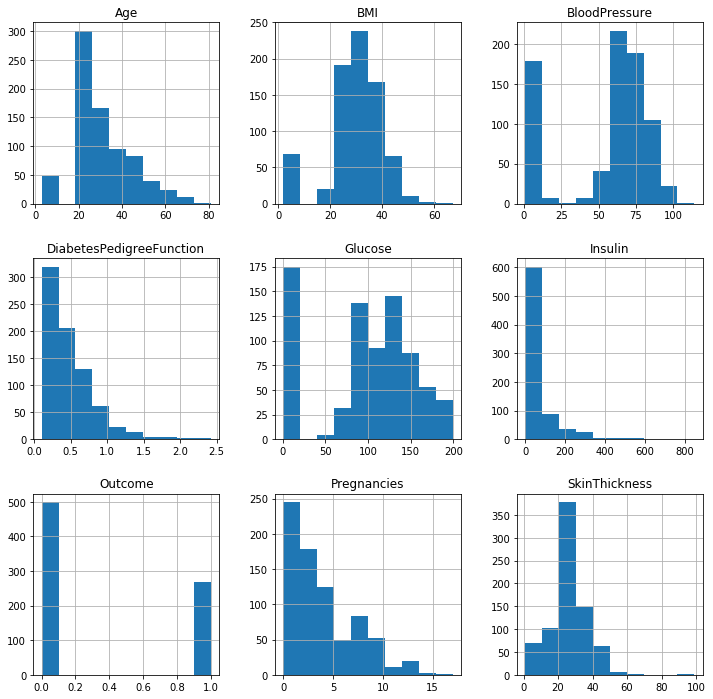

In [23]:
import matplotlib.pyplot as plt
df_del.hist(figsize=(12,12))
plt.show()

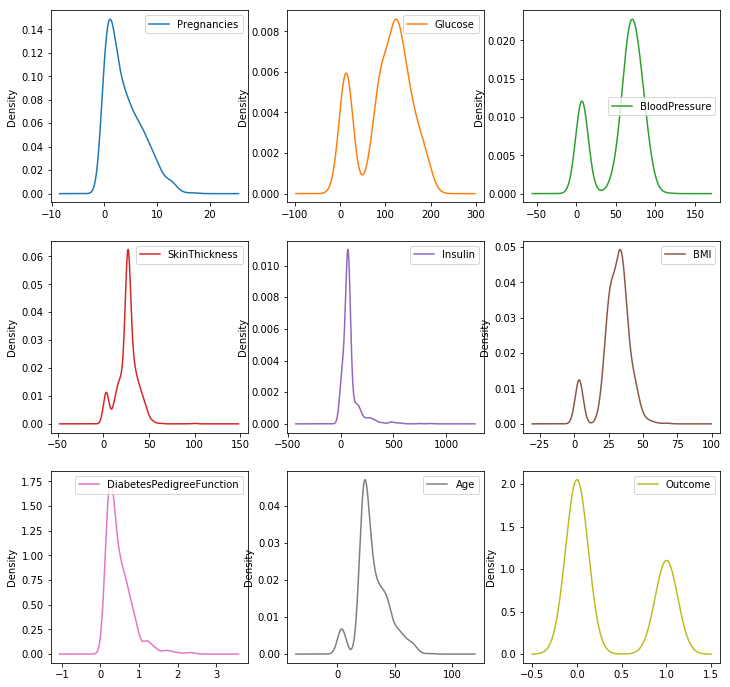

In [24]:
df_del.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(12,12))
plt.show()

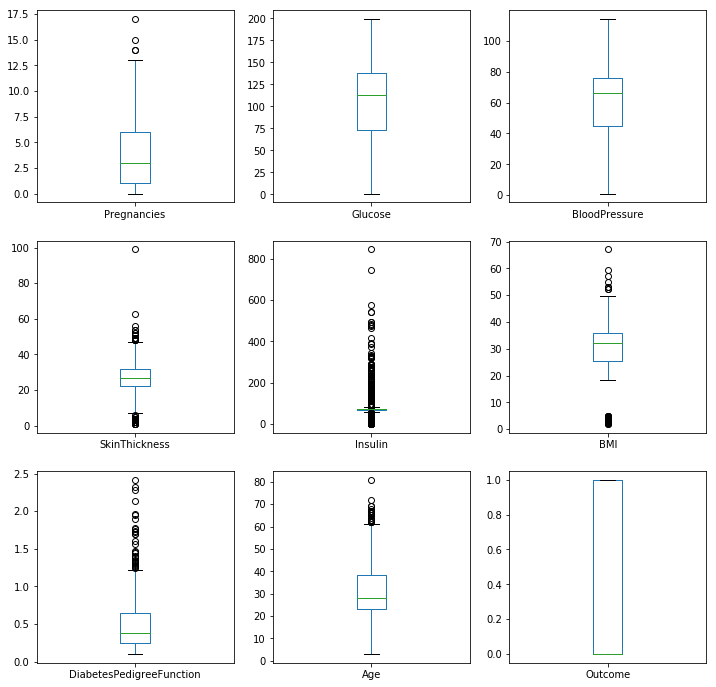

In [26]:
df_del.plot(kind='box',subplots=True,layout=(3,3),sharex=False,figsize=(12,12))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

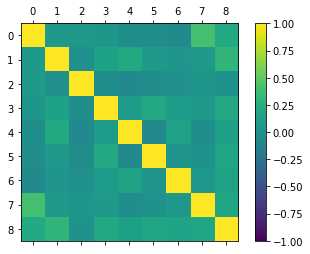

In [32]:
cor=df_del.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(cor,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show

AttributeError: module 'seaborn' has no attribute 'plt'

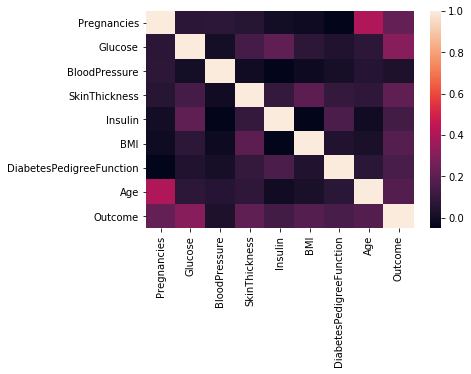

In [30]:
import seaborn as sns

sns.heatmap(df_del.corr())
sns.plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


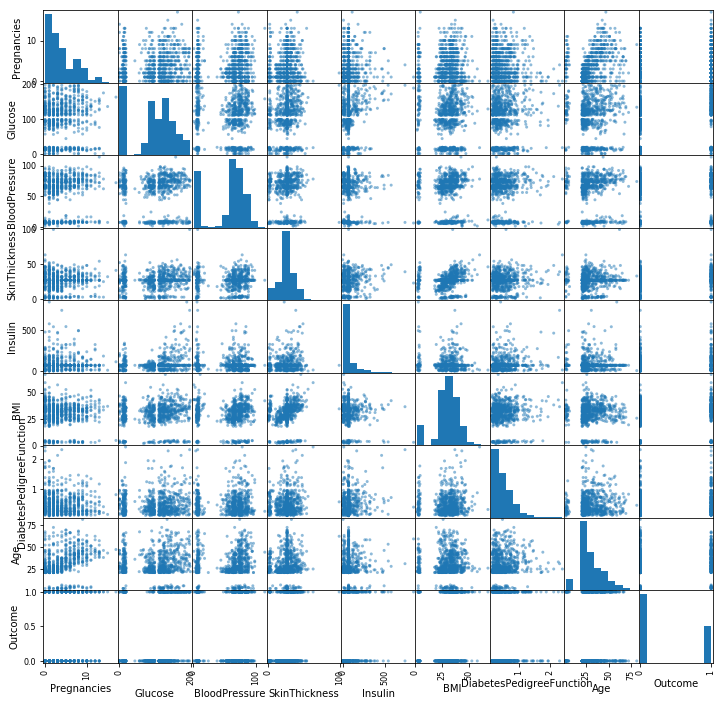

In [34]:
from pandas.tools.plotting import scatter_matrix

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


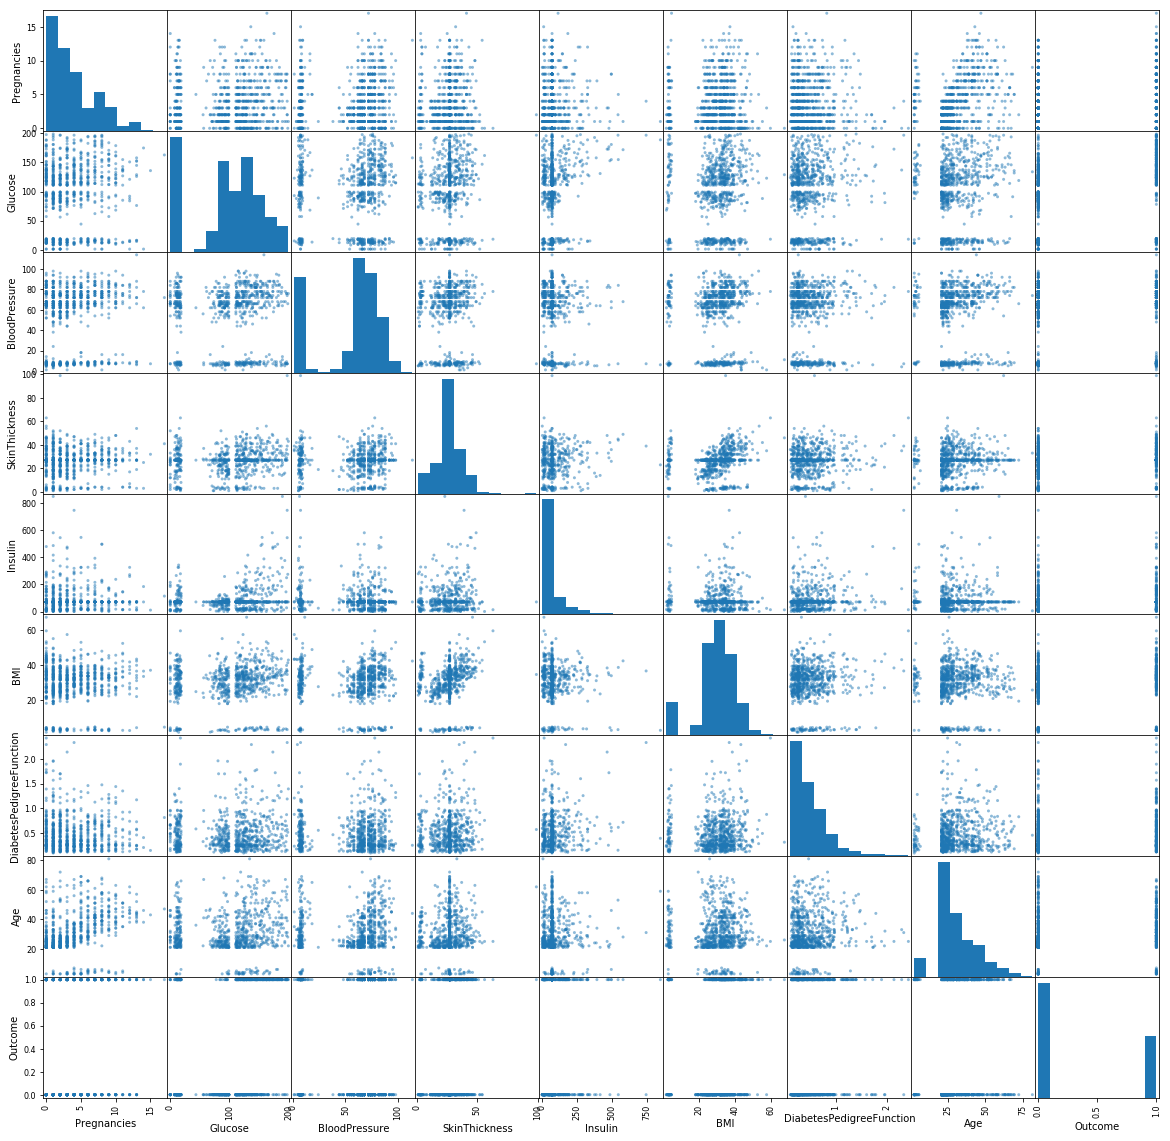

In [35]:
scatter_matrix(df_del,figsize=(20,20))
plt.show()